## Drawing Normally-distributed samples with the Box-Muller method

Assume we have two independent standard Normal random Cartesian variables $X$ and $Y$ follows standard normal distribution. The joint distribution $p(x,y)$ is:
$$p(x,y) = p(x)p(y) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}\frac{1}{\sqrt{2\pi}}e^{-\frac{y^2}{2}} = \frac{1}{2\pi}e^{-\frac{x^2 + y^2}{2}} $$

In polar corordinates, $x^2 + y^2 = r^2$ where $x = r\cos(\theta)$ $y = r\sin(\theta)$

then $p(x,y) = \left ( \frac{1}{2\pi} \right ) \left ( e^{\frac{-r^2}{2}} \right )$

which is the product of two density functions, an exponential distribution over squared radii: $r^2 \sim Exp(\frac{1}{2})$ and a uniform distribution over angles: $\theta \sim Unif(0,2\pi)$

Furthermore if we have:

$Exp(\lambda) = \frac{-\log (Unif(0,1))}{\lambda}$

then $r \sim \sqrt{-2\log (Unif(0,1))}$

So in order to generate a normal distrubution we can do as follows:

1. Generate $u_1,u_2 \sim Unif(0,1)$
2. ransform the variables into radius and angle representation $r = \sqrt{-2\log(u_1)}$ , and $\theta = 2\pi u_2$ 
3. Transform radius and angle into Cartesian coordinates: $x = r \cos(\theta)$, $y = r \sin(\theta)$




In [4]:
from numpy import random, sqrt, log, sin, cos, pi
from pylab import show,hist,subplot,figure

In [5]:
# transformation function
def gaussian(u1,u2):
  z1 = sqrt(-2*log(u1))*cos(2*pi*u2)
  z2 = sqrt(-2*log(u1))*sin(2*pi*u2)
  return z1,z2

In [8]:
# uniformly distributed values between 0 and 1
u1 = random.rand(1000)
u2 = random.rand(1000)

z1,z2 = gaussian(u1,u2)

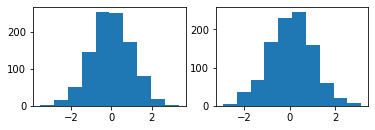

In [11]:
# plotting the values before and after the transformation
figure()
subplot(221)
hist(z1)
subplot(222)
hist(z2)
show()